In [1]:
import numpy as np
from sklearn.cluster import KMeans
from os.path import join
from os import listdir
from sklearn import metrics
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

### Evaluating clustering purity on EuroSat LandCover classification dataset

In [3]:
featdir = 'eurofeats'
files = sorted(listdir(featdir))
for file in files:
    data = np.load(join(featdir, file))
    labels = [f.split('/')[-2] for f in data['fnames']]
    feats = data['feats']
    kmmodel = KMeans(n_clusters=40, random_state=42).fit(feats)
    purity = purity_score(labels, kmmodel.labels_)
    print(file.split('.')[0].split('_')[1].capitalize(), 'Purity:', purity)


Eurosat Purity: 0.5182962962962963
Fulldata Purity: 0.5325925925925926
Imnet Purity: 0.420962962962963
Ours Purity: 0.542037037037037


### Visualizing Clusters

In [4]:
featdir = 'eurofeats'
files = sorted(listdir(featdir))
file = [f for f in files if '_ours' in f][0]
data = np.load(join(featdir, file))
labels = [f.split('/')[-2] for f in data['fnames']]
feats = data['feats']
kmmodel = KMeans(n_clusters=40).fit(feats)

In [5]:
%matplotlib inline

In [6]:
ddir = '/Path/To/Eurosat'

Cluster number: 1


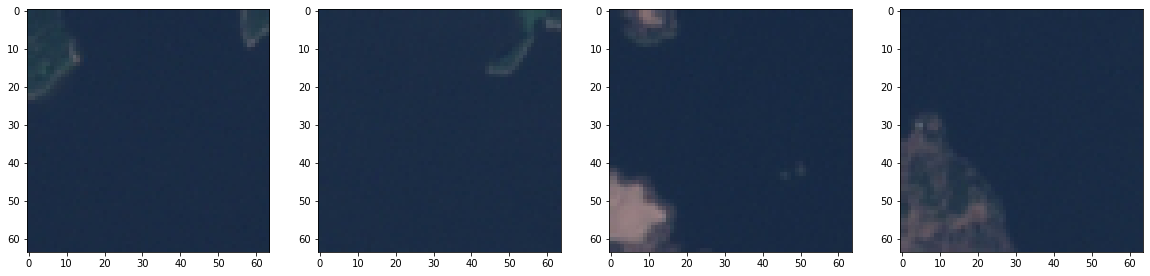

Cluster number: 2


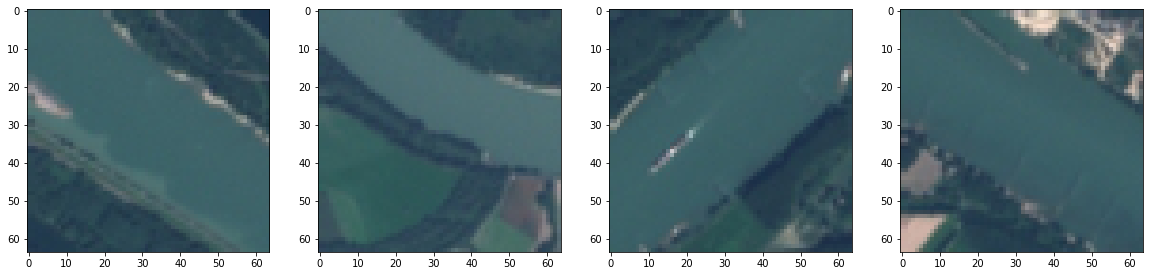

Cluster number: 3


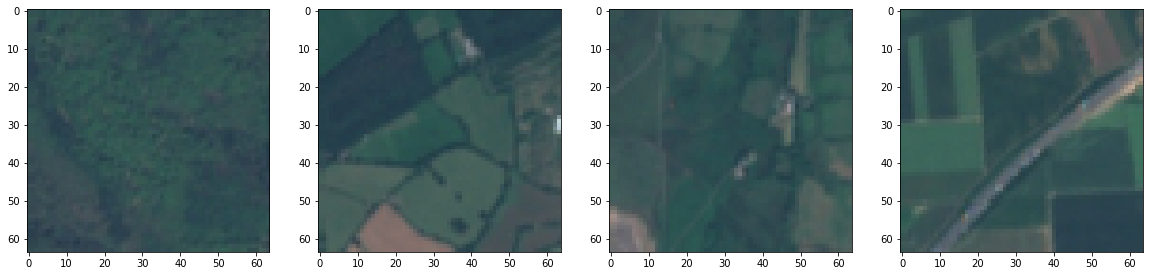

Cluster number: 4


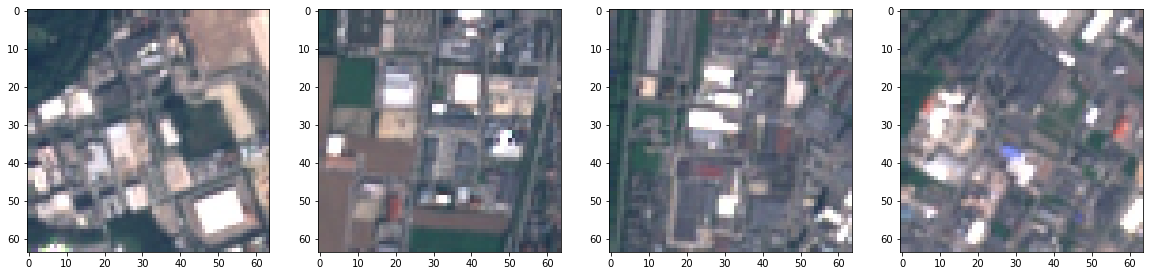

Cluster number: 5


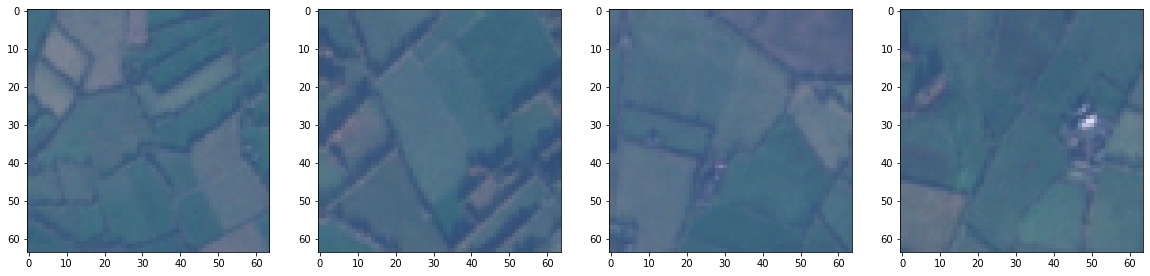

Cluster number: 6


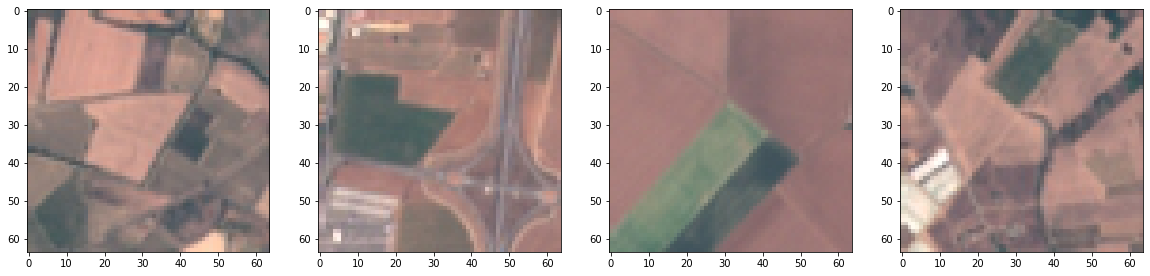

Cluster number: 7


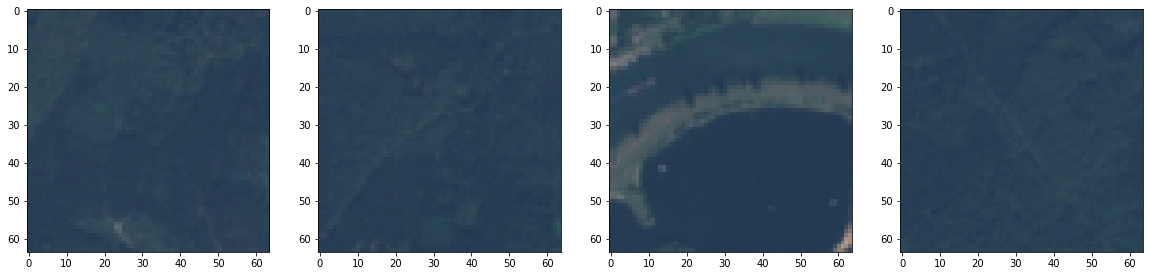

Cluster number: 8


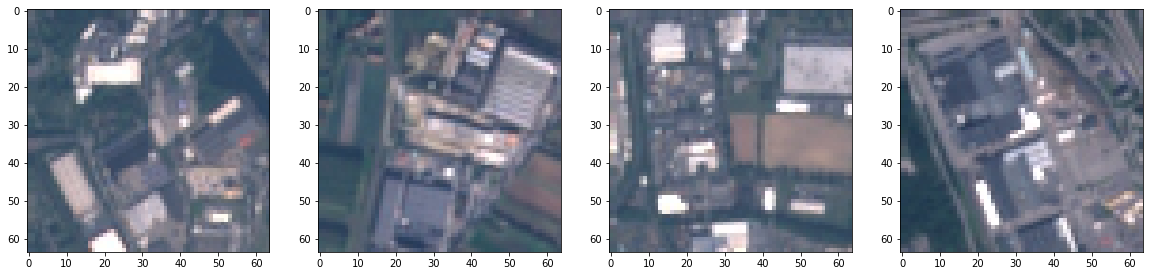

Cluster number: 9


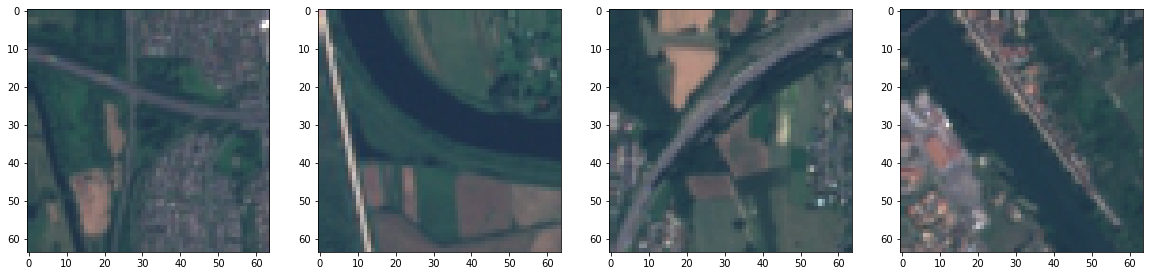

Cluster number: 10


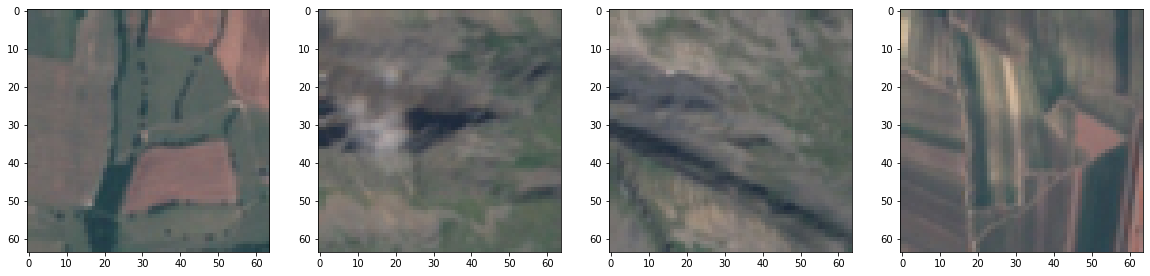

Cluster number: 11


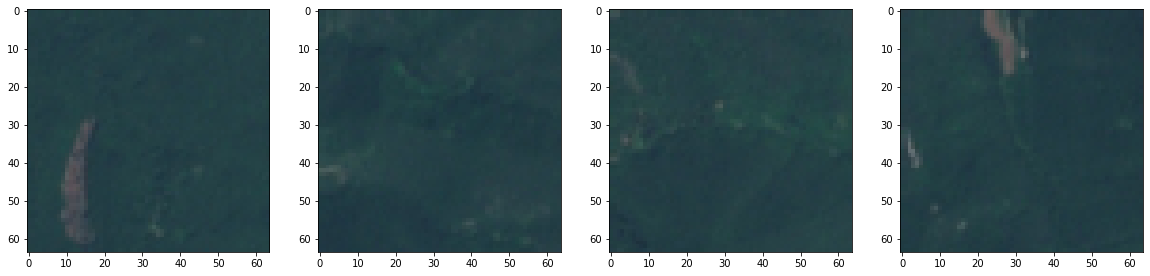

Cluster number: 12


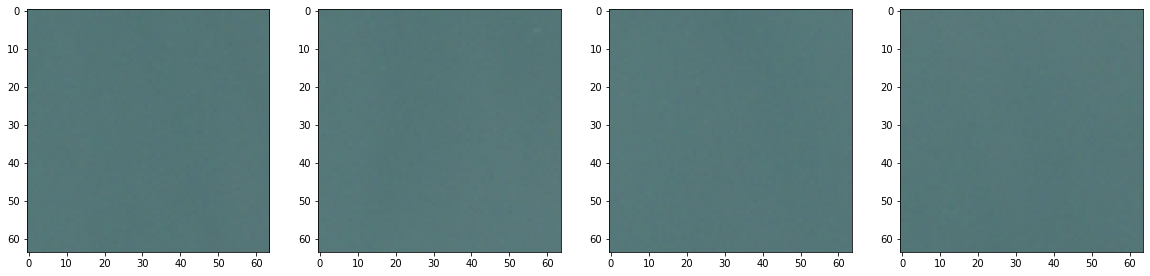

Cluster number: 13


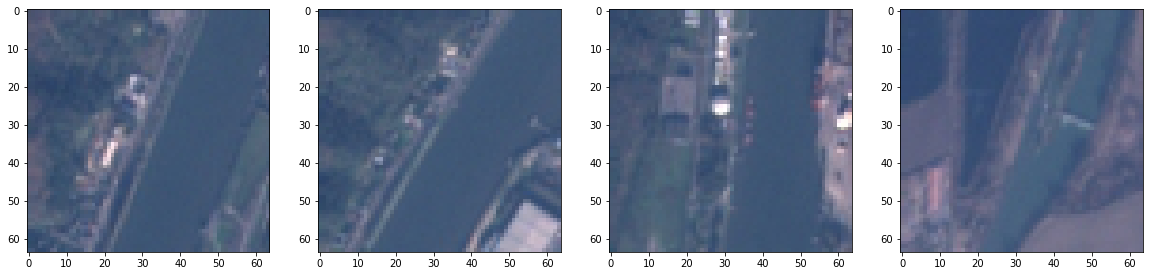

Cluster number: 14


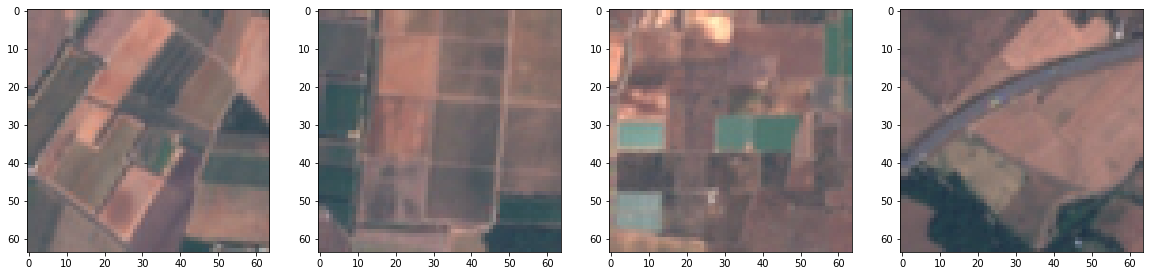

Cluster number: 15


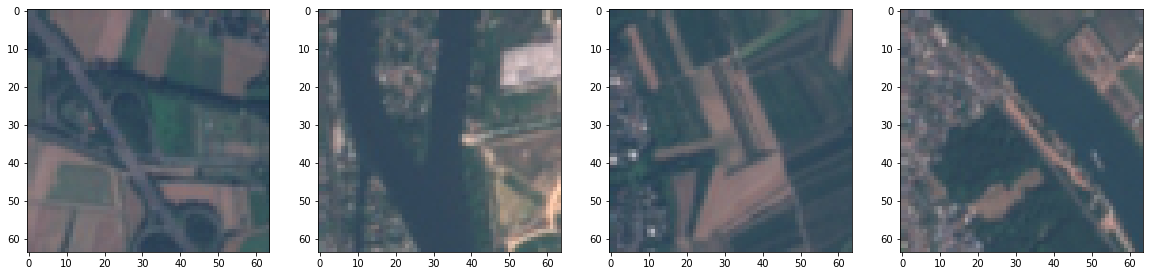

Cluster number: 16


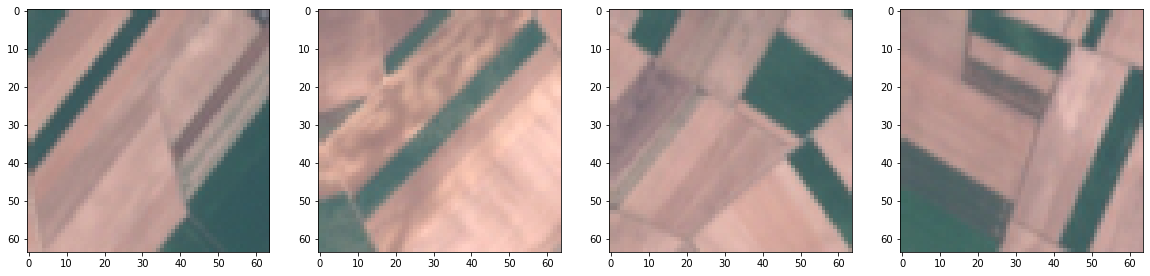

Cluster number: 17


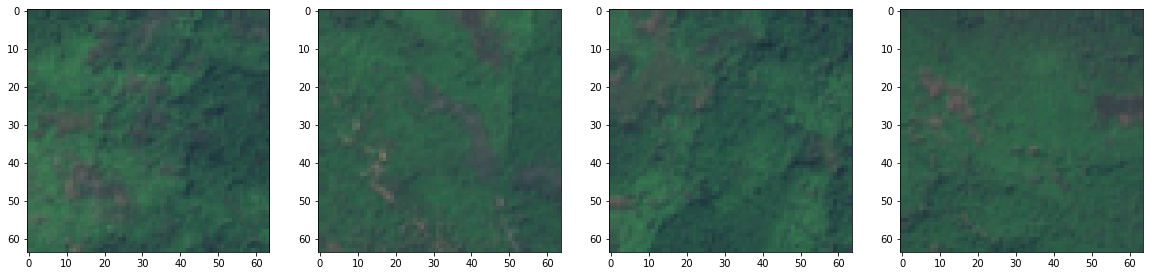

Cluster number: 18


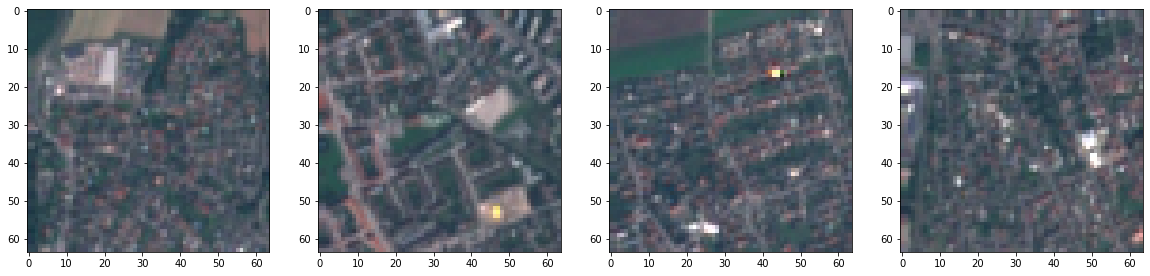

Cluster number: 19


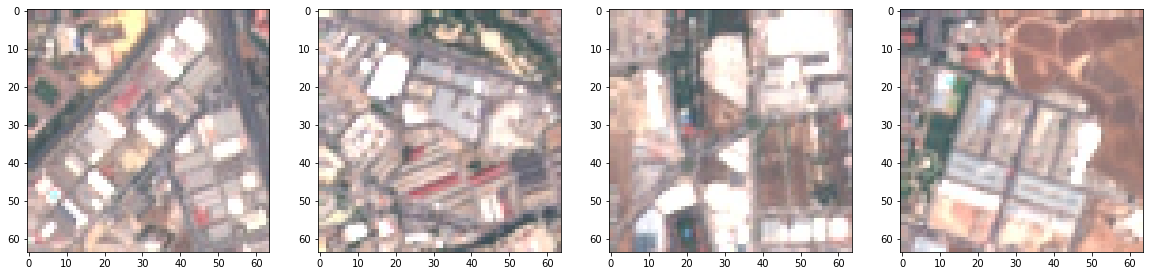

Cluster number: 20


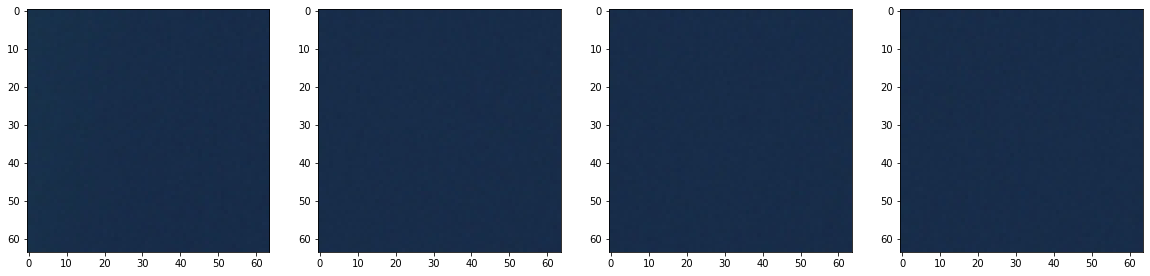

Cluster number: 21


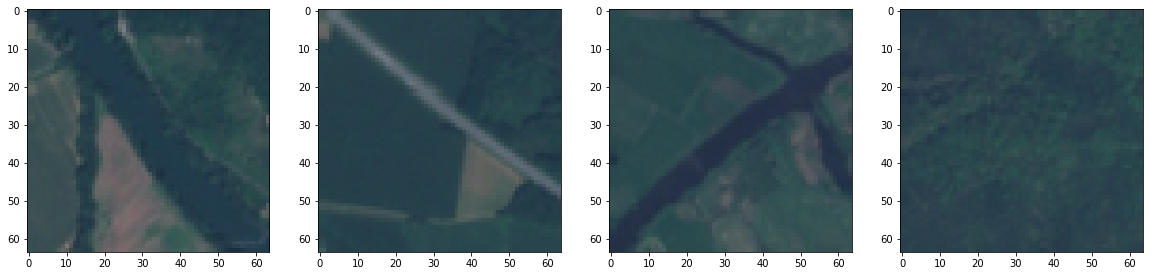

Cluster number: 22


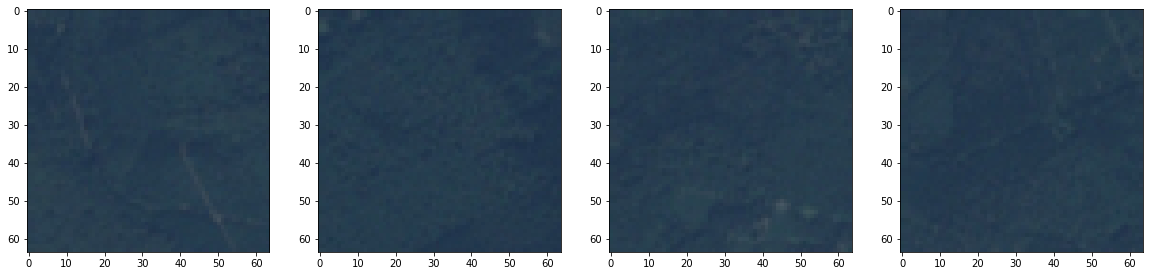

Cluster number: 23


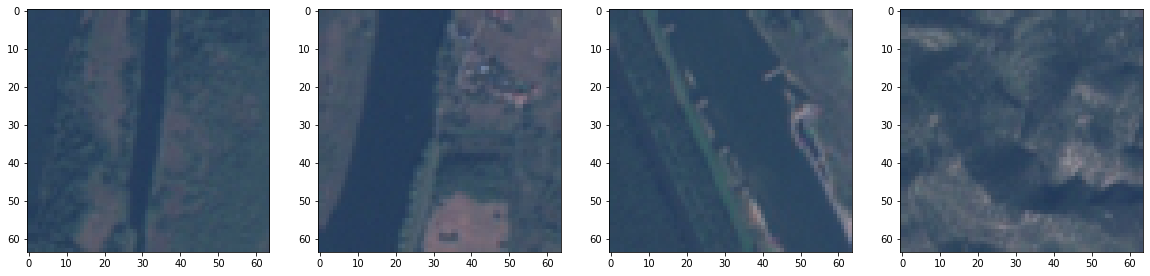

Cluster number: 24


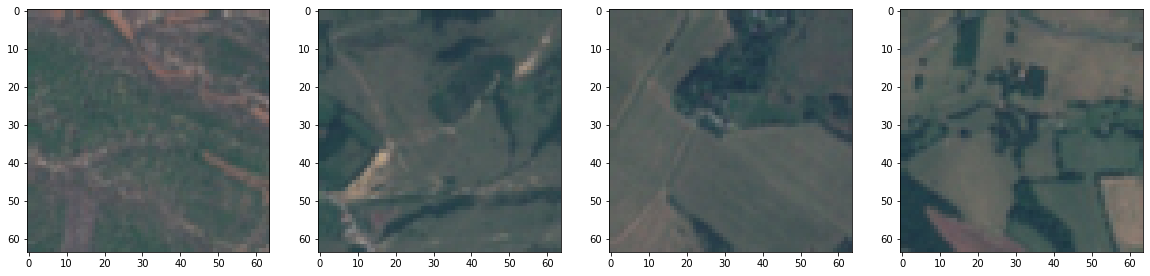

Cluster number: 25


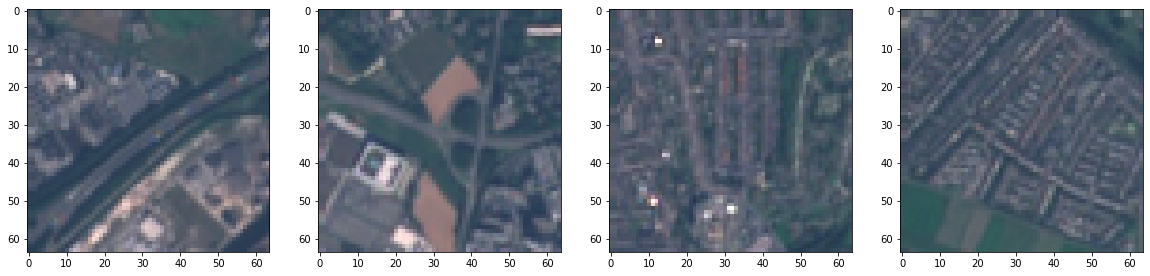

Cluster number: 26


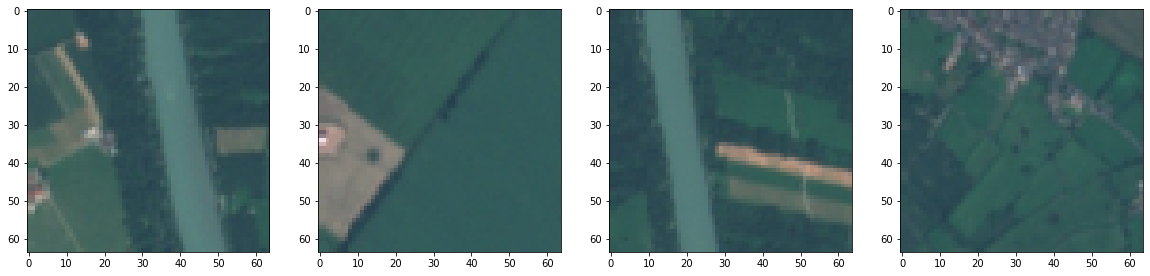

Cluster number: 27


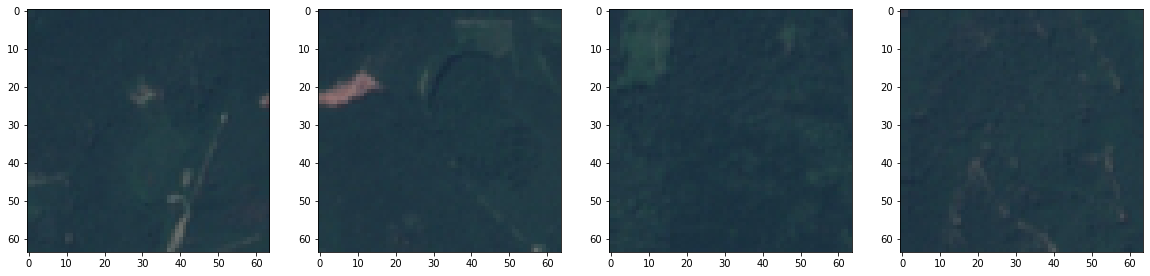

Cluster number: 28


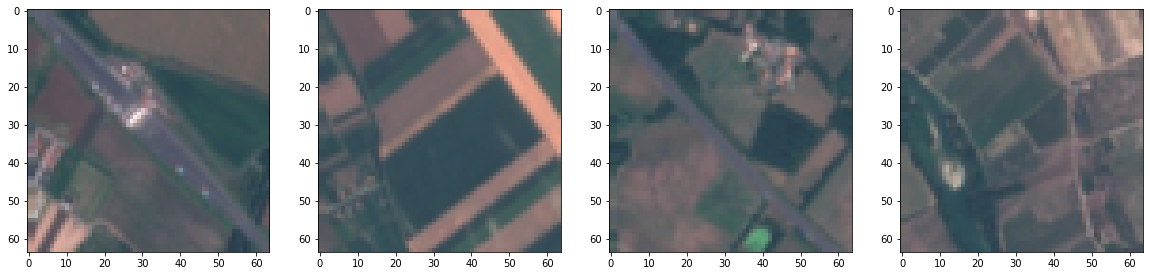

Cluster number: 29


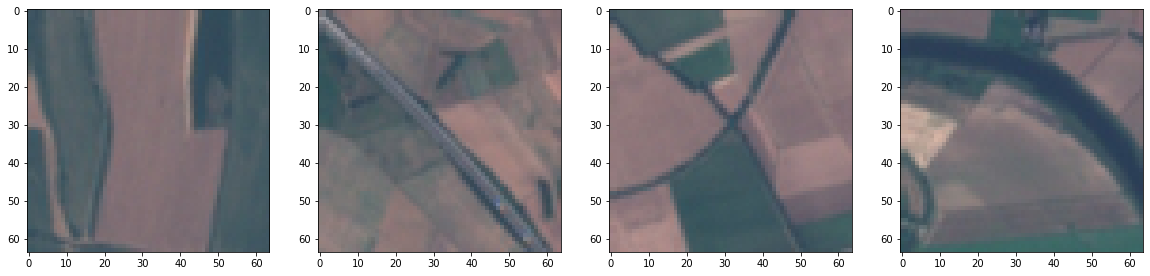

Cluster number: 30


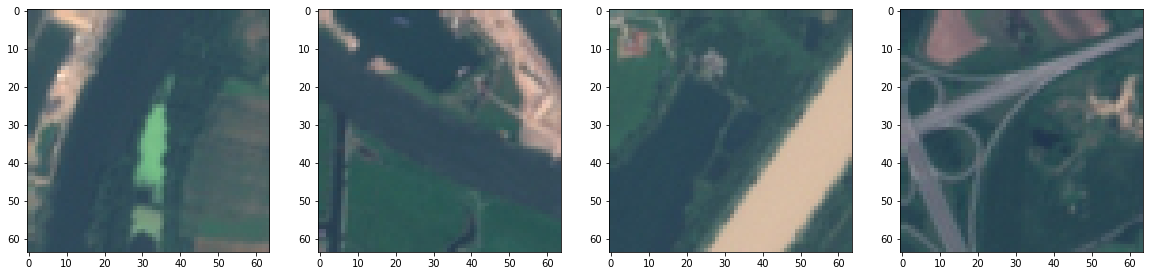

Cluster number: 31


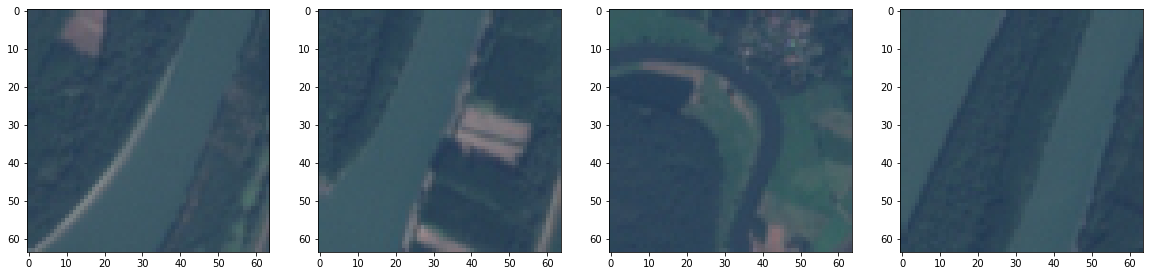

Cluster number: 32


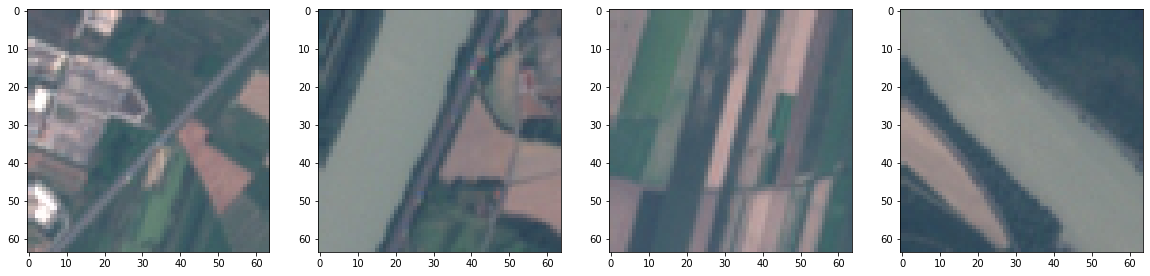

Cluster number: 33


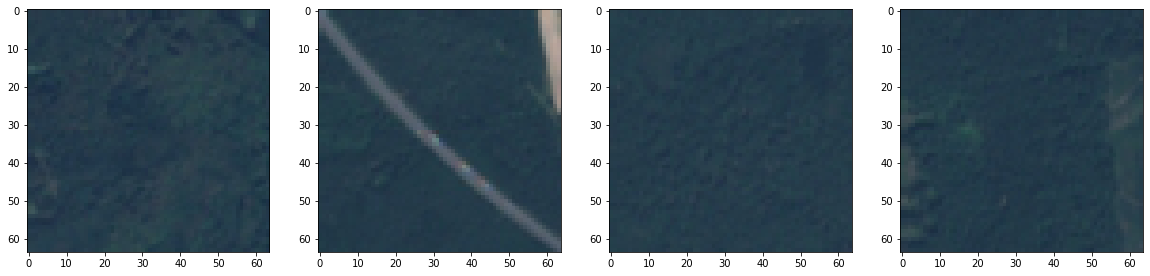

Cluster number: 34


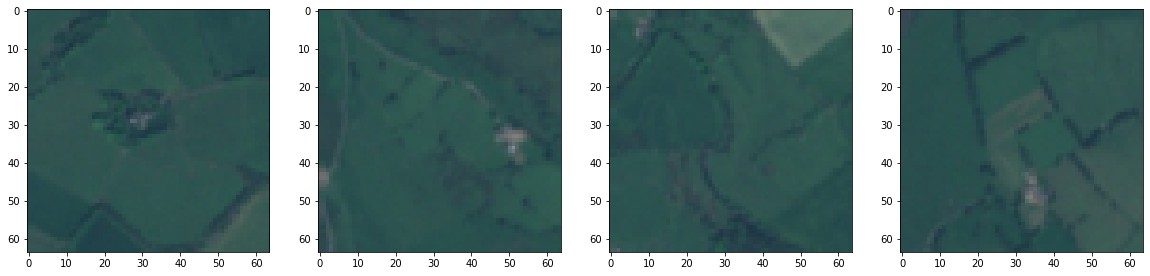

Cluster number: 35


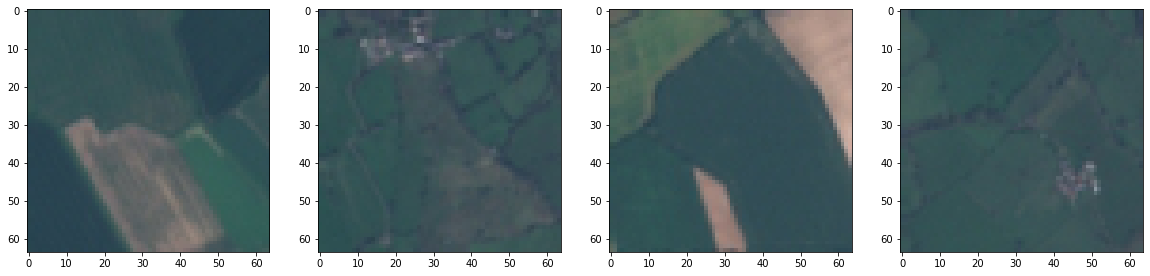

Cluster number: 36


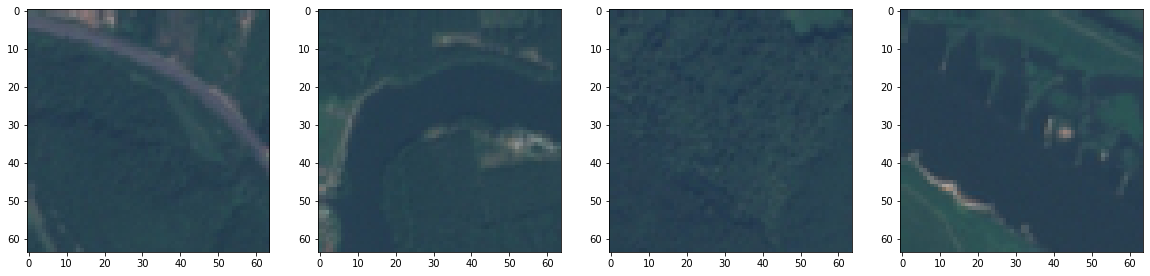

Cluster number: 37


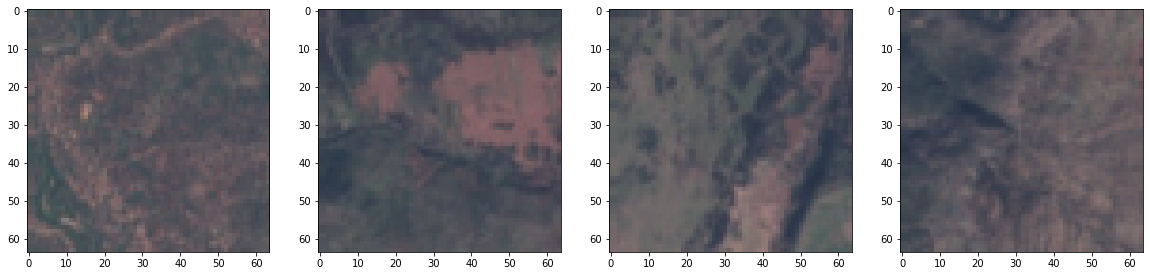

Cluster number: 38


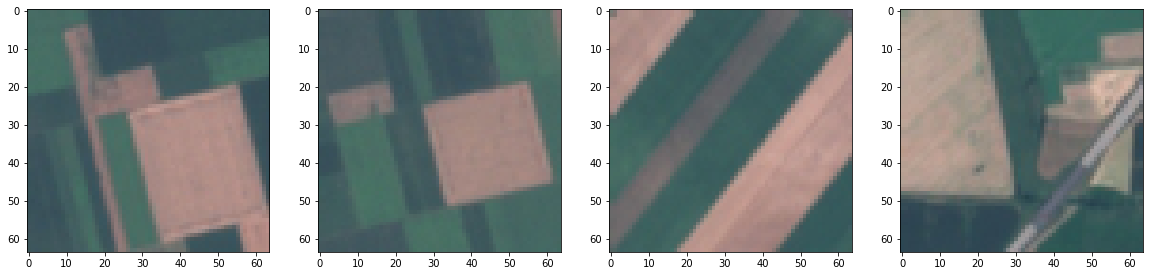

Cluster number: 39


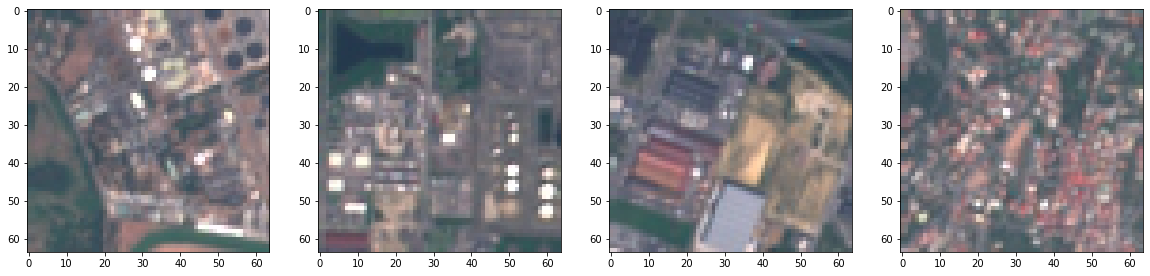

Cluster number: 40


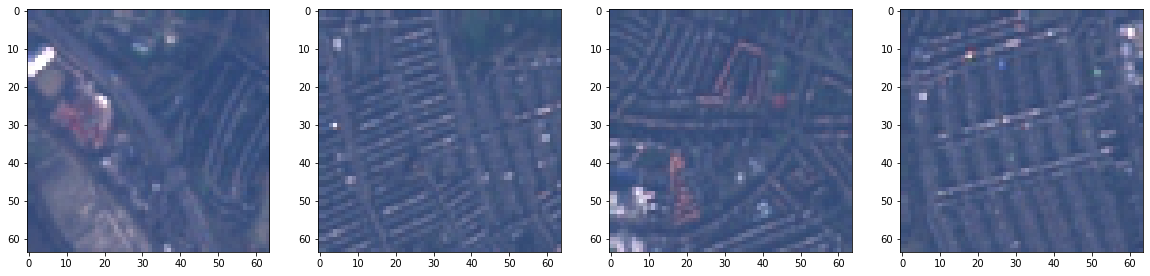

In [7]:
distance = kmmodel.transform(feats)
for i in range(40):
    print('Cluster number:', i+1)
    plt.figure(figsize=(20, 5))
    inds = np.argwhere(kmmodel.labels_==i)[:, 0]
    dists = distance[inds][:, i]
    inds = inds[np.argsort(dists)]
    for j in range(4):
        plt.subplot(1, 4, j+1)
        plt.imshow(np.array(Image.open(join(ddir, data['fnames'][inds[j]]))))
    plt.show()
    plt.close()